## 1. Problem Student

This project understands how the student's performance is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library

In [1]:
import sys
sys.executable

's:\\Code\\mlprojects\\venv\\python.exe'

In [2]:

pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.getcwd()


's:\\Code\\mlprojects\\notebook'

In [4]:
pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV data as pandas dataframe


In [6]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

## 2. About the data

In [8]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='str')

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3. Data Checks to perform

* Check missing values
* Check duplicates
* Check the data type
* Check the number of unique values of each column
* Check the statistic of data set
* Check various categories present in the different categorical column

## 3.1 Checking Missing values

In [11]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values


## 3.2 Checking Duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

## 3.3 Checking data types


In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


## 3.4 Checking the number of unique of each column


In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check stats of data set


In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3.7 Exploring data

In [16]:
print("Categories in 'gender' variable:     ",end= " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variavble:    ",end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variavble:    ",end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variavble:    ",end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variavble:    ",end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      <StringArray>
['female', 'male']
Length: 2, dtype: str
Categories in 'race_ethnicity' variavble:     <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
Categories in 'parental_level_of_education' variavble:     <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categories in 'lunch' variavble:     <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categories in 'test preparation course' variavble:     <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [18]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'str' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'str' ]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding columns for "Total Score" and "average"


In [20]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [26]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students who got less than 20 in Maths: {math_less_20}')
print(f'Number of students who got less than 20 in Writing: {writing_less_20}')
print(f'Number of students who got less than 20 in reading: {reading_less_20}')



Number of students who got less than 20 in Maths: 4
Number of students who got less than 20 in Writing: 3
Number of students who got less than 20 in reading: 1


## 4.Exploring data


4.1 Visualize average score distribution to make some conclusion

* Histogram
* Kernel Distribution Function (KDE)

4.1.1 Histogram & KDE

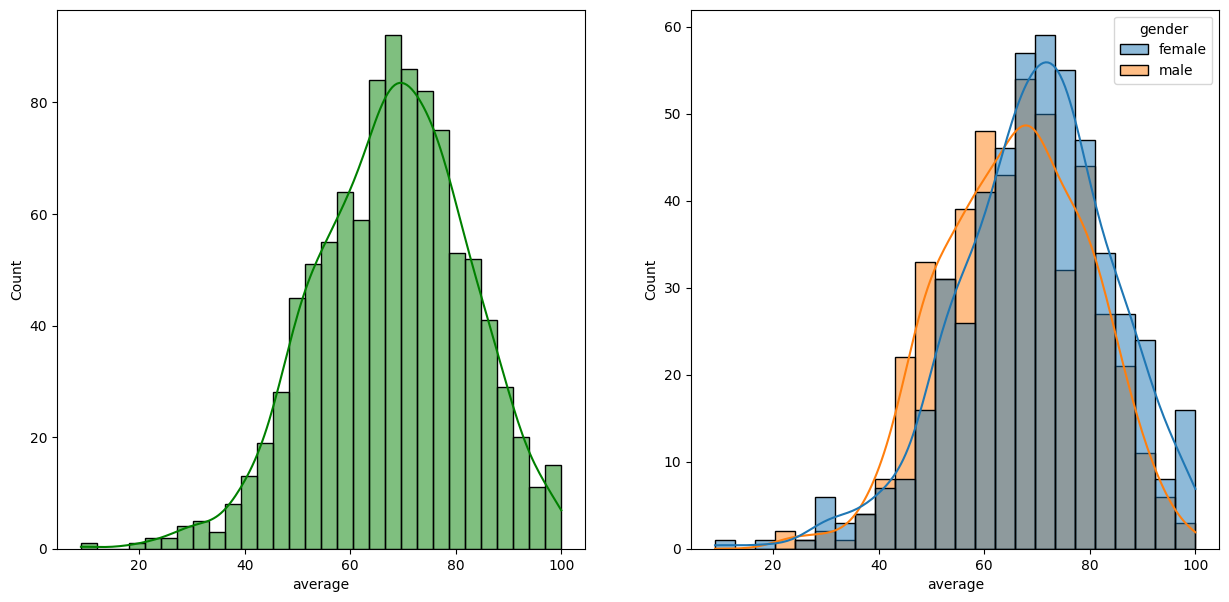

In [29]:
fig, axs = plt.subplots(1,2,figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data=df, x= 'average', kde = True, hue='gender')
plt.show()

* Female students perform better than male students.

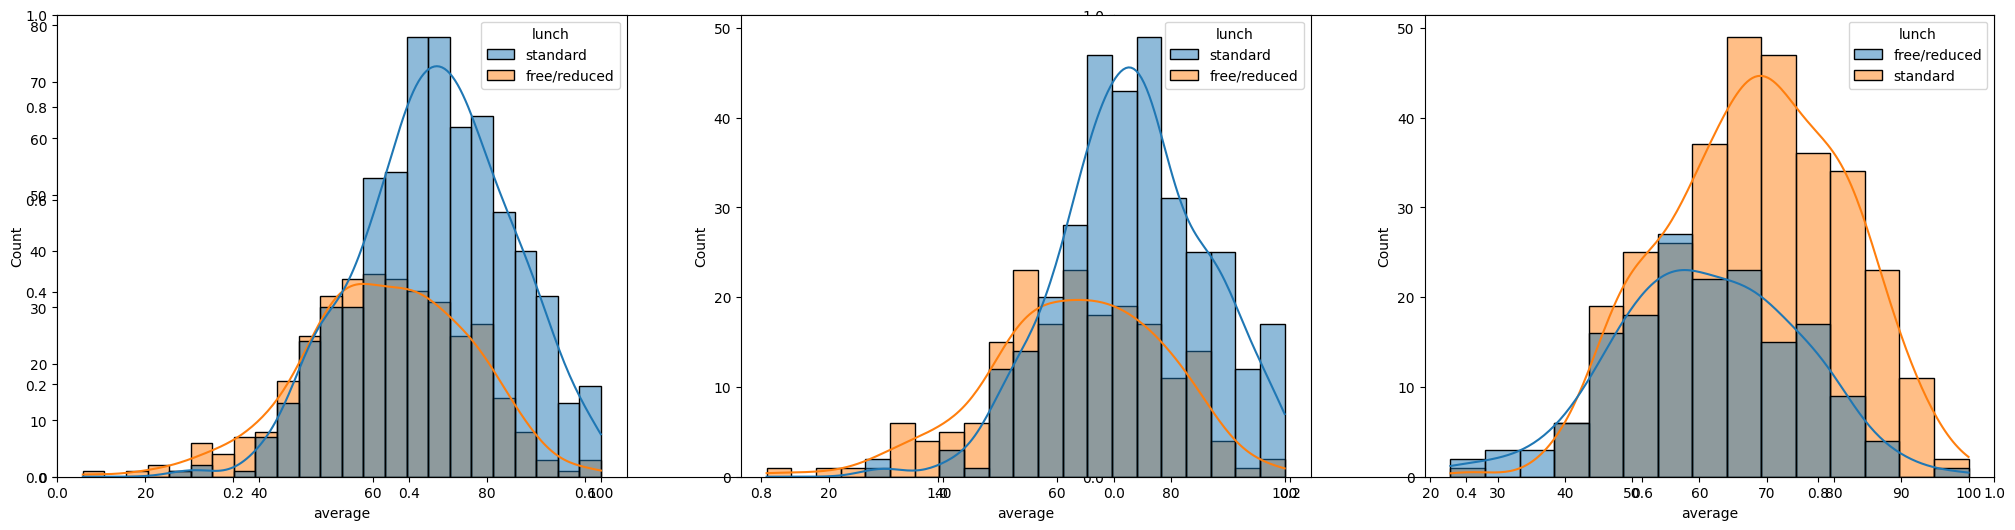

In [31]:
plt.subplots(1,2,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x = 'average',kde= True,hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == "male"],x = 'average',kde = True,hue='lunch')
plt.show()

* Standard lunch helps perform well in exams

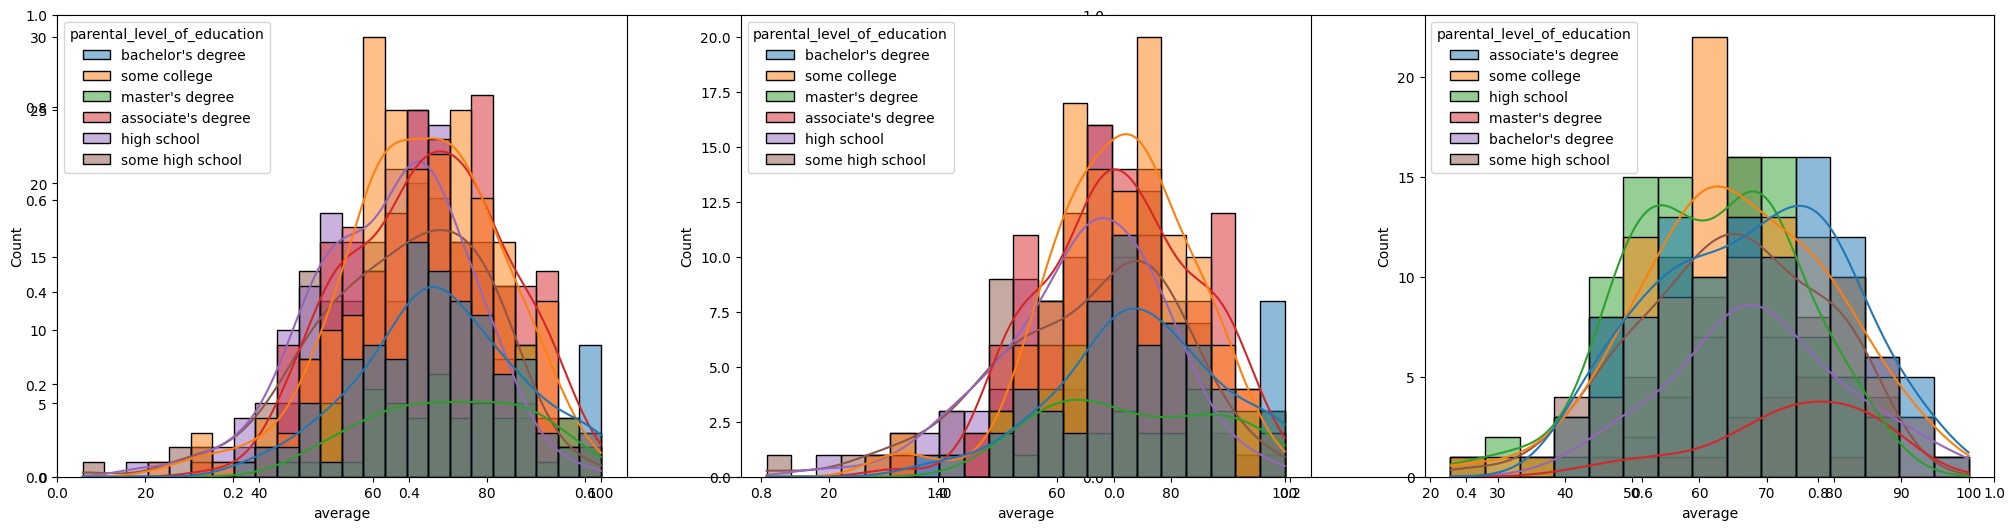

In [32]:
plt.subplots(1,2,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x = 'average',kde= True,hue = 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df.gender == "male"],x = 'average',kde = True,hue='parental_level_of_education')
plt.show()

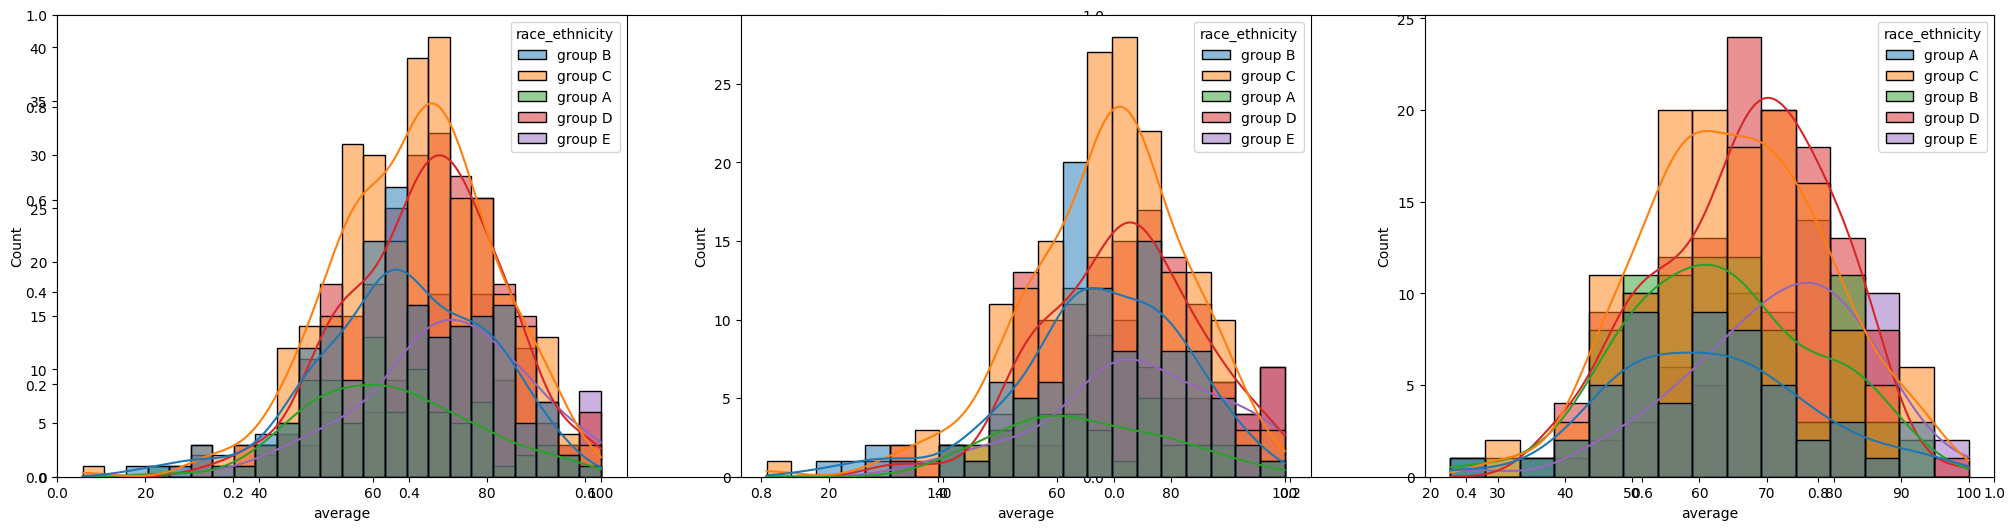

In [34]:
plt.subplots(1,2,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x = 'average',kde= True,hue = 'race_ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender == "male"],x = 'average',kde = True,hue='race_ethnicity')
plt.show()